<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">


# Telecomm EDA Challenge Lab

_Author: Alex Combs (NYC) _

---

Let's do some Exploratory Data Analysis (EDA)! As a data scientist, you often may find yourself given a data set you've never seen before, and asked to do a rapid analysis. This is today's goal.

# Prompt

You work for a telecommunications company. The company has been storing metadata about customer phone usage, as part of the regular course of business. Currently, this data is sitting in an unsecured database. The company doesn't want to pay to increase their database security, because they don't think there's really anything to be learned from the metadata.

They are under pressure from "right to privacy" organizations to beef up the database security. These organizations argue that you can learn a lot about a person from their cell phone metadata.

The telecom company wants to understand if this is true, and they want your help. They will give you one person's metadata for 2014 and want to see what you can learn from it.

Working in teams, create a report revealing everything you can about the person. Prepare a presentation, with slides, showcasing your findings.


# The Data

The [person's metadata](./datasets/metadata.csv) has the following fields:

| Field Name          | Description
| ---                 | ---
| **Cell Cgi**        | cell phone tower identifier
| **Cell Tower**      | cell phone tower location
| **Comm Identifier** |	de-identified recipient of communication
| **Comm Timedate String** | time of communication
| **Comm Type	Id**  | type of communication
| **Latitude**        | latitude of communication
| **Longitude**       | longitude of communication


# Hints

This is totally open-ended! If you're totally stumped -- and only if stumped -- should you look below for prompts. As a starting point, given that you have geo-locations, consider investigating ways to display this type of information (i.e. mapping functionality).

<font color='white'>
Well for starters, he's in Australia!

Ideas for things to look into:
- where does he work?
- where does he live?
- who does he contact most often?
- what hours does he work?
- did he move?
- did he go on holiday?  If so, where did he go?
- did he get a new phone?

Challenges:
- how does he get to work?
- where does his family live?
- if he went on holiday, can you find which flights he took?
- can you guess who some of his contacts are, based on the frequency, location, time and mode (phone/text) of communications?


If you're stuck on how to map the data, you can try "basemap" or "gmplot", or anything else you find online.
</font>

In [27]:
import numpy as np
import pandas as pd

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

metadata = pd.read_csv('./datasets/metadata.csv')

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [2]:
metadata.head()

,Cell Cgi,Cell Tower Location,Comm Identifier,Comm Timedate String,Comm Type,Latitude,Longitude
0,50501015388B9,REDFERN TE,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 9:40,Phone,-33.892933,151.202296
1,50501015388B9,REDFERN TE,62157ccf2910019ffd915b11fa037243b75c1624,4/1/14 9:42,Phone,-33.892933,151.202296
2,505010153111F,HAYMARKET #,c8f92bd0f4e6fb45ed7fce96fc831b283db2b642,4/1/14 13:13,Phone,-33.880329,151.205690
3,505010153111F,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 13:13,Phone,-33.880329,151.205690
4,5.05E+106,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 17:27,Phone,-33.880329,151.205690


In [3]:
metadata.describe()

,Latitude,Longitude
count,10476.000000,10476.000000
mean,-35.136188,150.612841
std,3.141723,1.470169
min,-42.884810,144.848243
25%,-33.884603,151.202296
50%,-33.796610,151.266540
75%,-33.788150,151.266540
max,-33.557310,151.289340


In [37]:
print "Cell Cgi:",metadata["Cell Cgi"].nunique()
print "Cell Tower Location:",metadata["Cell Tower Location"].nunique()
print "Comm Identifier:",metadata["Comm Identifier"].nunique()
print "Comm Type:",metadata["Comm Type"].nunique()
print "Comm Type:",metadata["Comm Type"].unique()

Cell Cgi: 131
Cell Tower Location: 71
Comm Identifier: 130
Comm Type: 3
Comm Type: ['Phone' 'SMS' 'Internet']


In [40]:
def f(row):
    if row['Comm Type'] == "Phone":
        val = 1
    else:
        val = 0
    return val

metadata_no_internet = metadata.drop(metadata[(metadata["Comm Type"] == "Internet")].index)
metadata_no_internet["Phone"] = metadata_no_internet.apply(f, axis=1)

In [42]:
metadata_no_internet.head()

,Cell Cgi,Cell Tower Location,Comm Identifier,Comm Timedate String,Comm Type,Latitude,Longitude,Phone
0,50501015388B9,REDFERN TE,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 9:40,Phone,-33.892933,151.202296,1
1,50501015388B9,REDFERN TE,62157ccf2910019ffd915b11fa037243b75c1624,4/1/14 9:42,Phone,-33.892933,151.202296,1
2,505010153111F,HAYMARKET #,c8f92bd0f4e6fb45ed7fce96fc831b283db2b642,4/1/14 13:13,Phone,-33.880329,151.205690,1
3,505010153111F,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 13:13,Phone,-33.880329,151.205690,1
4,5.05E+106,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 17:27,Phone,-33.880329,151.205690,1


In [47]:
y = metadata_no_internet["Comm Identifier"] #Recipient
X = metadata_no_internet.drop("Comm Identifier", axis = 1)
X = X.drop("Comm Type", axis = 1)
X = X.drop("Cell Cgi", axis = 1)
X = X.drop("Latitude", axis = 1)
X = X.drop("Longitude", axis = 1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

rd_r2_train = knn.score(X_train, y_train)
rd_r2_test = knn.score(X_test, y_test)

print "R2 on train: {}".format(rd_r2_train)
print "R2 on test: {}".format(rd_r2_test)

Coefficients = pd.DataFrame(zip(X_train, knn.coef_), columns=("feature", "coef"))
Coefficients.sort_values("coef", ascending=False)

ValueError: invalid literal for float(): 1/13/15 14:16

In [49]:
metadata.groupby(["Comm Type"]).size()

Comm Type
Internet    9102
Phone        717
SMS          657
dtype: int64

In [73]:
Comms = metadata_no_internet.groupby(["Comm Identifier","Comm Type"]).size().sort_values(ascending = False)

In [78]:
def addrows(row):
    return row["Phone"] + row["SMS"]

In [88]:
Comms2 = Comms.unstack()
Comms2 = Comms2.fillna(0)
Comms2["Total"] = Comms2.apply(addrows, axis=1)
Comms2 = Comms2.sort_values(["Total"], ascending = False)

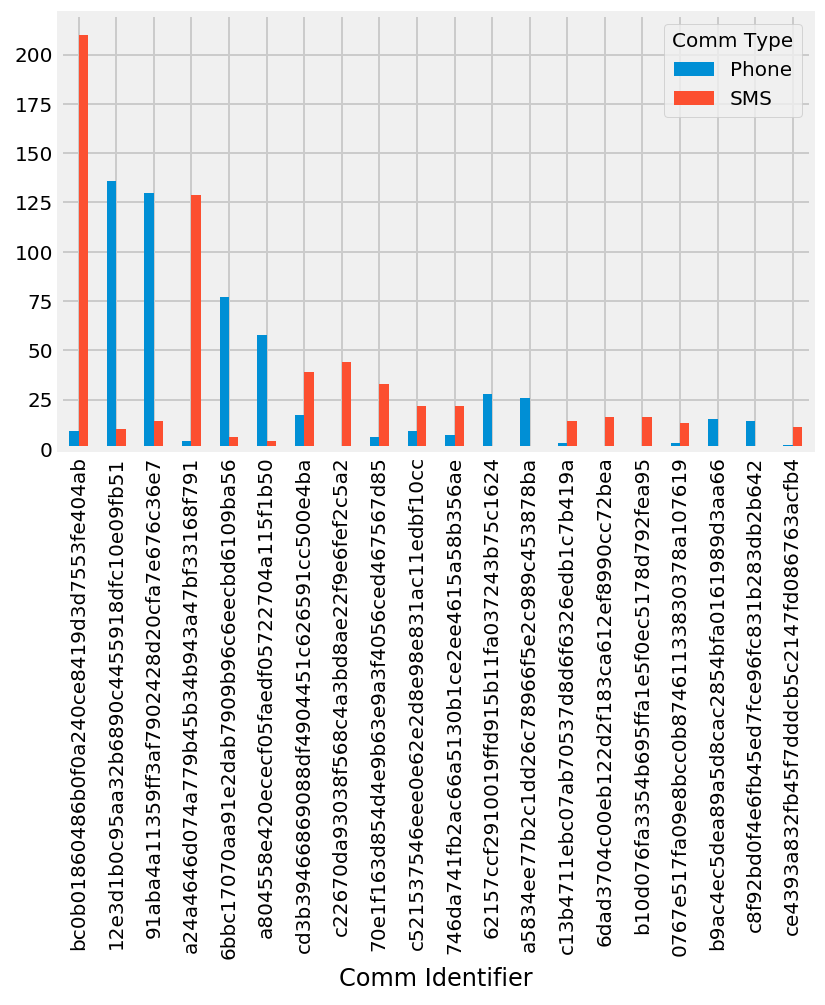

In [94]:
Comms2[0:20].drop("Total", axis=1).plot(kind = "bar")

In [100]:
metadata_no_internet.head()

,Cell Cgi,Cell Tower Location,Comm Identifier,Comm Timedate String,Comm Type,Latitude,Longitude,Phone
0,50501015388B9,REDFERN TE,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 9:40,Phone,-33.892933,151.202296,1
1,50501015388B9,REDFERN TE,62157ccf2910019ffd915b11fa037243b75c1624,4/1/14 9:42,Phone,-33.892933,151.202296,1
2,505010153111F,HAYMARKET #,c8f92bd0f4e6fb45ed7fce96fc831b283db2b642,4/1/14 13:13,Phone,-33.880329,151.205690,1
3,505010153111F,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 13:13,Phone,-33.880329,151.205690,1
4,5.05E+106,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 17:27,Phone,-33.880329,151.205690,1


In [101]:
import datetime as dt

In [105]:
metadata_no_internet["DateTime"] = metadata_no_internet.to_datetime(metadata_no_internet["Comm Timedate String"])

AttributeError: 'DataFrame' object has no attribute 'to_datetime'